<a href="https://colab.research.google.com/github/Abdourahim445/FDSFE_Asylla/blob/main/Asylla_FDSFE_MIDTERM_2024_real_estate_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FDSFE 2024  MIDTERM: Real Estate Price Prediction Using Data Science


# Cameras must be on.
If your computer camera does not work connect with your phone and have that camera on. No exceptions.

# You can use any NON-LIVE reference you want: books, google, old homeworks. You can use AI recommendations within the notebook

# You CANNOT communicate with anyone but the instructors.
Ask questions on the midterm slack channel  or by unmuting on zoom

# You CANNOT exchange information with classmates.

# Violation of the rules will result in 0 grade no exception. Note that the history of your notebooks will be available to us!! so anything that cannot be explained in your work will be considered a violation of the rules



# DELIVERY: **AT THE START OF CLASS** OPEN A NOTEBOOK CHANGE THE TITLE TO \<YOURNAME FDSFE MIDTERM\> AND SHARE IT WITH THE INSTRUCTORS. This is the notebook you will work in, do not change it during the exam.

sharing it with fbianco@udel.edu and fortino@udel.edu!, see images that follow

At the end of the allotted time your notebook will already be available to us and this will be the mode of delivery - no github uploads no canvas.






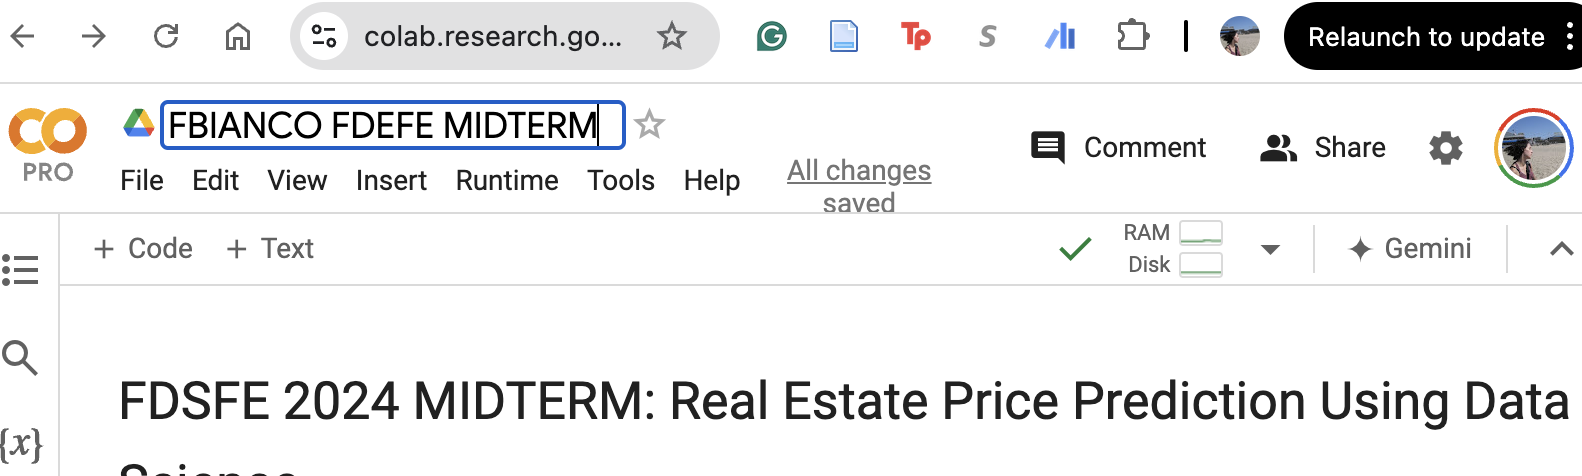


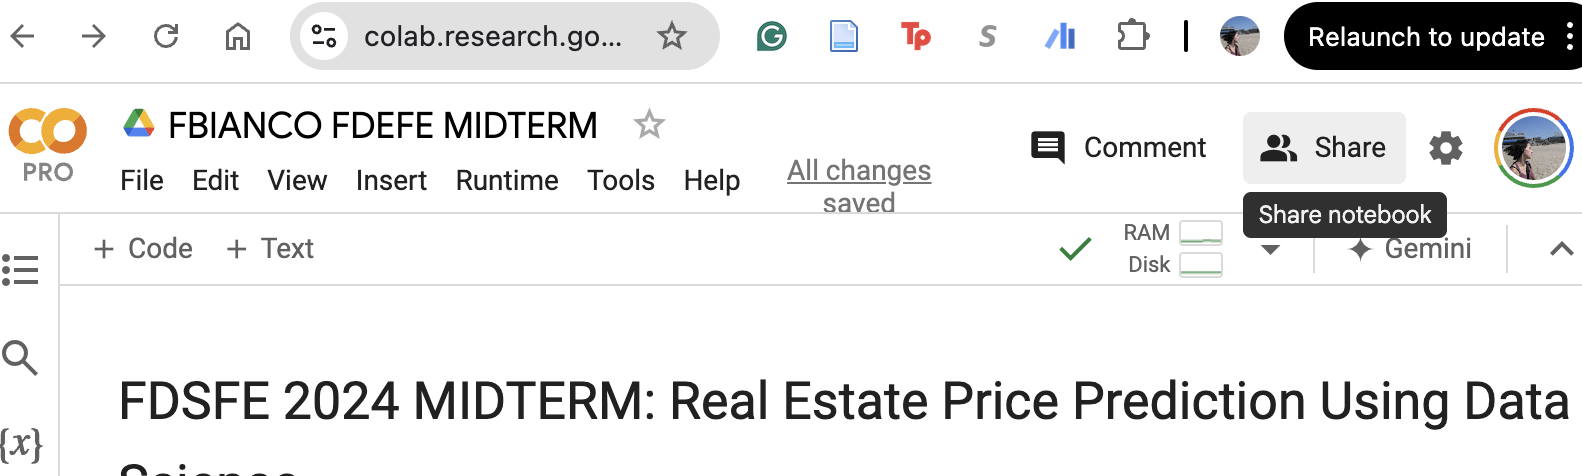




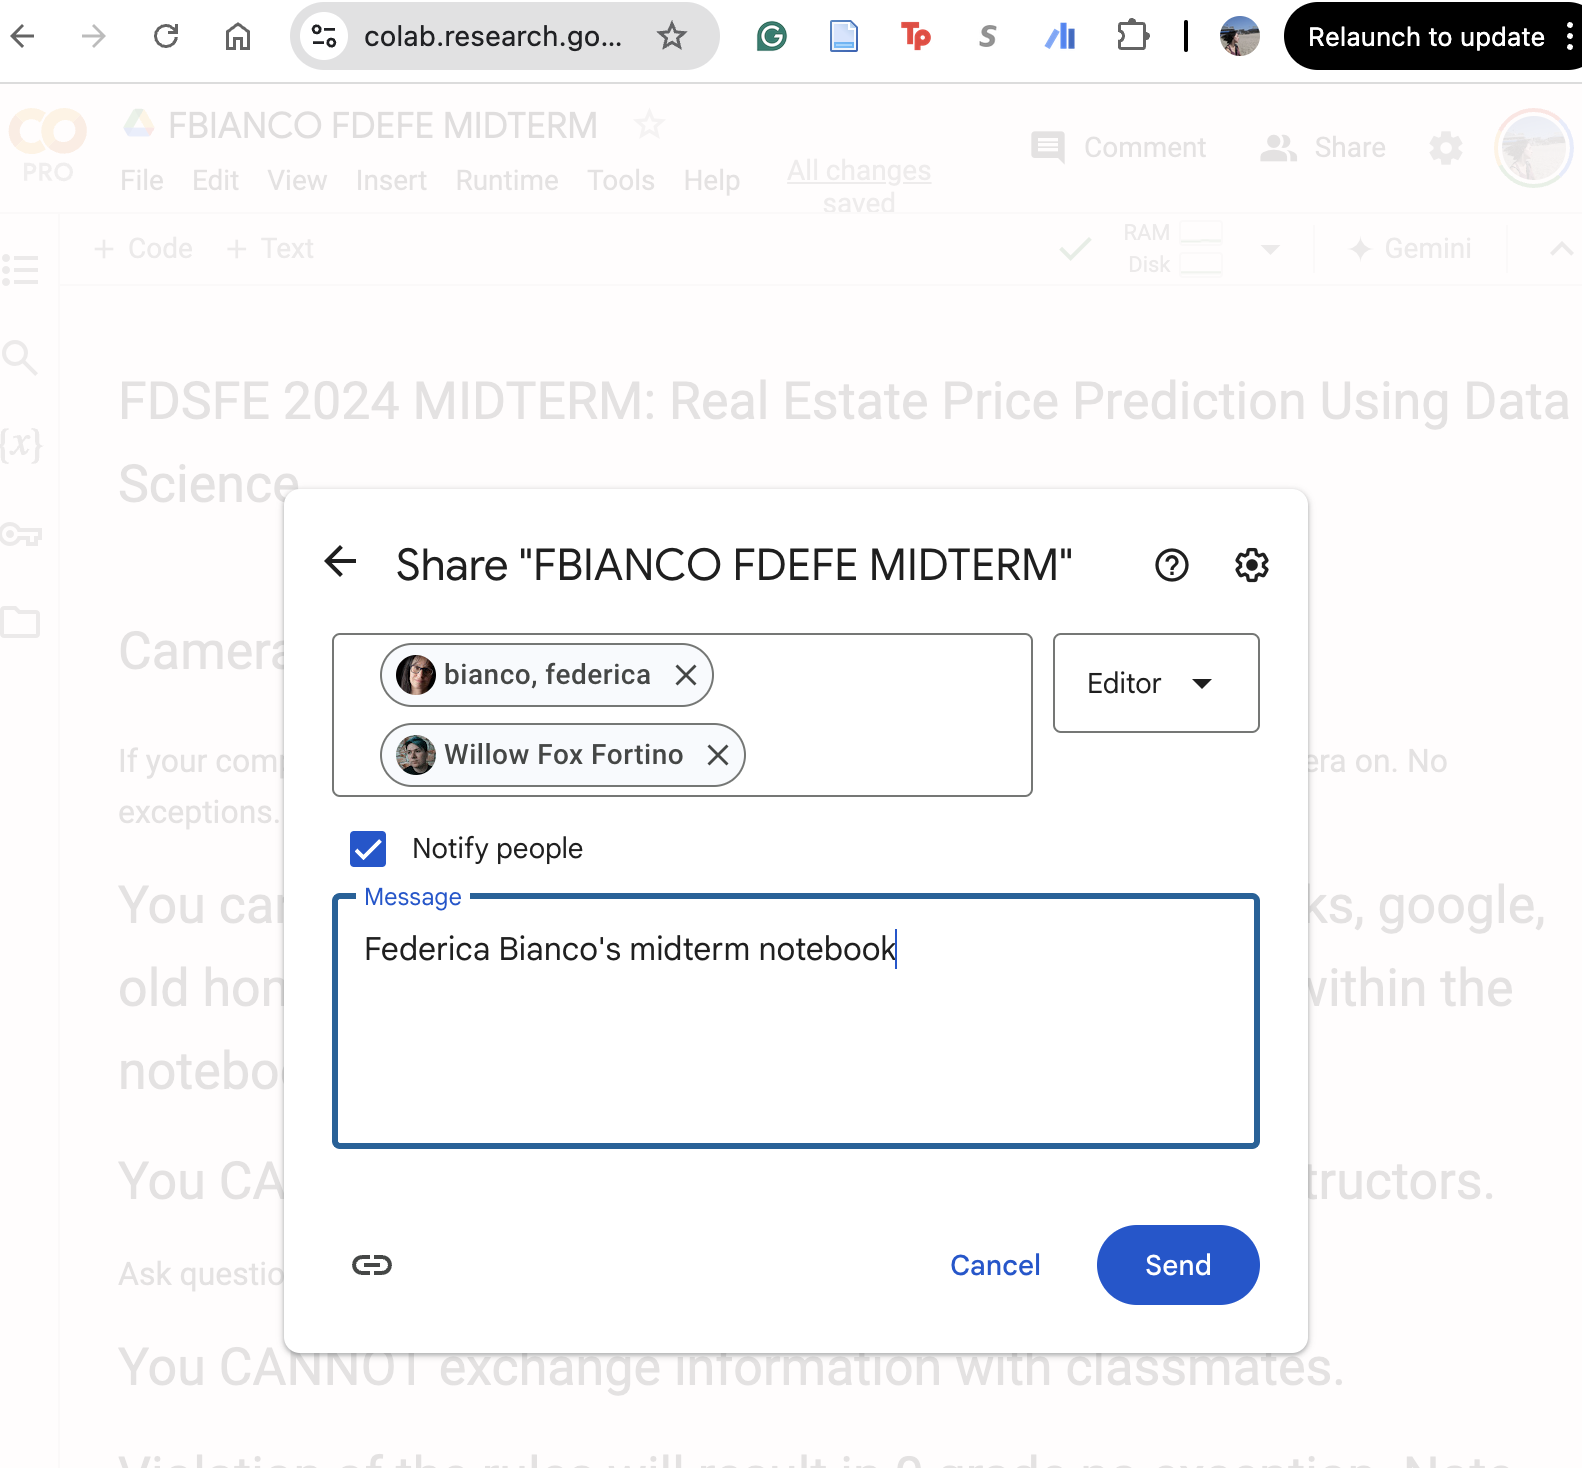

In this exam you will work with a dataset of real estate prices in Bengaluru India. You have to read in, explore the data, and build a simple linear regression model to predict house price from its characteristics

The data is in my github repo [https://github.com/fedhere/FDEFE_midterm2024](https://github.com/fedhere/FDEFE_midterm2024) in the subfolder `data` and it is called `Bengaluru_House_Data.csv`


10 points for presentation: is the notebook clear and clean of clutter and mess? are the results printed neatly, are values printed with the apprioriate amount of decimal digits, etc.

Task 1: Read in the data (10 points)

Task 2: Basic exploration of data format  (10 points)

Task 3: Descriptive Statistics  (15 points)

Task 4: Create a reduced dataset  (15 points)

Task 5: Data Cleaning  (15 points)

Task 6: Visual exploration of the data  (10 points)

(OPTIONAL TASK 7)

TASK 8: Correlation analysis  (15 points)

Task 9:  Build a linear regression using the most linearly correlated feature as exogenous (independent) variable  (10 points)

(OPTIONAL ADDITIONAL TASKS)

The required task allow the student to get 100/100 points. Additional tasks are available. If the student lost points on the mandatory tasks the additional ones may compensate for those points


# Data Cleaning and Preparation


In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

plt.rcParams["figure.figsize"] = (4,2)

In [121]:
#def Bhouses():
   # """
  #  This function will be called in the cells below indicating that you must
   # replace it and write code there.

   # Do not change this function.
   # """
  ##print('You should have replaced the text "Bhouses" with code you wrote to do the task!')

# Task 1: Read in the data


In [122]:
#read in the data, call your dataframe Bhouses
Bhouses = pd.read_csv('https://raw.githubusercontent.com/fedhere/FDEFE_midterm2024/main/data/Bengaluru_House_Data.csv')

# Task 2: Basic exploration of data format
- print the top 10 rows of the data
- print the bottom 10 rows of the data
- print the shape of the dataset and reply in text (either in a print statement or a text cell: how many _columns_ and how many _rows_ are in the dataset)

In [123]:
Bhouses.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [124]:
Bhouses.tail(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13310,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,NaN,1050,2.0,2.0,52.71
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.00
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,NaN,1262,2.0,2.0,47.00
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.00


In [125]:
Bhouses.shape

(13320, 9)

# Task 3: Descriptive Statistics:
- get the statistical properties of each column (mean, median, min, max....), and comment on what you notice from this report
- the data type for each column

In [126]:
Bhouses.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


The number of columns present are only 3, this is because only these columns contain numerical values since we are trying to find the descriptive statistics.

In the task above you should have used the .describe() method.

Only a few columns are shown in df.describe()? Why? because the other columns are not numerical!

**total_sqft** _should_ be numerical too tho, as it reports the total square footage which is a numerical quantity.

Sometimes a numerical colum has a few entries that have words in them, thus Pandas default to read all entries as strings. The next few lines of code will convert the numerical values in the column to float, **and will set the other values to NaN (Not a Number)**.

The cell of code does the conversion for you. So long as you used the suggested name for the dataframe and you have read in the data correctly this code should work and convert the column for you.


In [127]:
#Convert 'total_sqft' to numeric, handling non-numeric values
Bhouses['total_sqft'] = pd.to_numeric(Bhouses['total_sqft'], errors='coerce')
Bhouses['total_sqft']

,total_sqft
0,1056.0
1,2600.0
2,1440.0
3,1521.0
4,1200.0
...,...
13315,3453.0
13316,3600.0
13317,1141.0
13318,4689.0


# Task 4: Create a reduced dataset
- create a reduced dataset with only the numerical columns and the make sure you include the column called "total_sqft"  
- examine the new dataframe appropriately (check shape and data types)

In [128]:
# Bhouses_restricted  should be the original dataset with but ontain only the numerical columns (see Bhouses.info() to figure out which are numerical)
Bhouses_restricted = Bhouses[['total_sqft', 'bath', 'balcony', 'price']]
Bhouses_restricted

,total_sqft,bath,balcony,price
0,1056.0,2.0,1.0,39.07
1,2600.0,5.0,3.0,120.00
2,1440.0,2.0,3.0,62.00
3,1521.0,3.0,1.0,95.00
4,1200.0,2.0,1.0,51.00
...,...,...,...,...
13315,3453.0,4.0,0.0,231.00
13316,3600.0,5.0,NaN,400.00
13317,1141.0,2.0,1.0,60.00
13318,4689.0,4.0,1.0,488.00


In [129]:
Bhouses_restricted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_sqft  13073 non-null  float64
 1   bath        13247 non-null  float64
 2   balcony     12711 non-null  float64
 3   price       13320 non-null  float64
dtypes: float64(4)
memory usage: 416.4 KB


In [130]:
Bhouses_restricted.shape

(13320, 4)

# Task 5: Data Cleaning

- Check for NaN and take care of them as you see apprioriate. The resulting dataset **should have no NaN values** (hint: save the shape of the DF in a variable shape_original)
- Report on the new shape of the dataframe, what fraction of the dataset was lost (as a percentage)




In [131]:
shape_original = Bhouses_restricted.shape
shape_original

(13320, 4)

In [132]:
Bhouses_cleaned = Bhouses_restricted.dropna()
Bhouses_cleaned

,total_sqft,bath,balcony,price
0,1056.0,2.0,1.0,39.07
1,2600.0,5.0,3.0,120.00
2,1440.0,2.0,3.0,62.00
3,1521.0,3.0,1.0,95.00
4,1200.0,2.0,1.0,51.00
...,...,...,...,...
13314,1715.0,3.0,3.0,112.00
13315,3453.0,4.0,0.0,231.00
13317,1141.0,2.0,1.0,60.00
13318,4689.0,4.0,1.0,488.00


In [133]:
shape_new = Bhouses_cleaned.shape
shape_new

#fraction lost
fraction_lost = (shape_original[0] - shape_new[0]) / shape_original[0] * 100
fraction_lost

print(f"Original shape: {shape_original}")
print(f"New shape: {shape_new}")
print(f"Fraction of the dataset lost: {fraction_lost:.2f}%")

Original shape: (13320, 4)
New shape: (12525, 4)
Fraction of the dataset lost: 5.97%


In [134]:
Bhouses_restricted.isnull().sum() #keep this cell of code and make sure the output is the same as below

,0
total_sqft,247
bath,73
balcony,609
price,0


# Task 6: Visual exploration of the data
- Make a histogram of each column
- remember that figures without captions **do not count** and captions should describe WHAT is plotted HOW the plot is designed (x, y axis, colors) and WHY it is interesting (what do you see in the plot?)

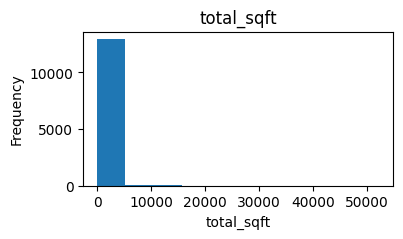

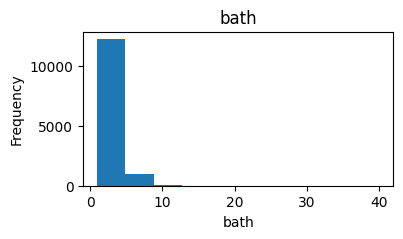

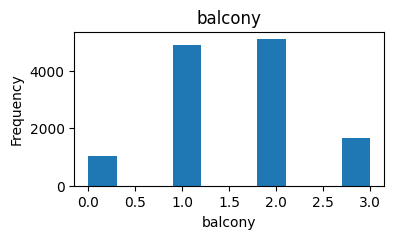

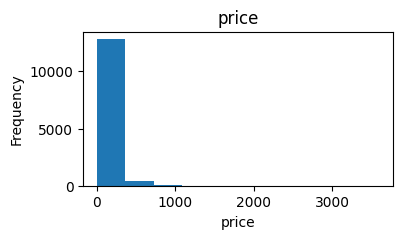

In [135]:
for c in Bhouses_restricted.columns:
    plt.figure()
    plt.hist(Bhouses_restricted[c])
    plt.title(c)
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.show()
    #remember axis lables! they are missing from the plot below - and captions!

Histogram plots to help us visualize the data. We notice that there are outliers in "price", "bath", and "total_sqft".

# Task 7: OPTIONAL: Do it only if you are doing good with time. Do you have at least 45 minutes left? More data cleaning:

Why do some of the histograms have so much white space to the right? (because there are very few, very high value entries!)

remove outliers:
- total_sqft: Choose a value for total_sqft that can be considered an upper limit of the distribution such that values larger than this are "outliers". Exclude the corresponding rows from the dataframe.

- bath: do the same for bath

- price: do the same for price

- report on data loss

- replot the histograms and describe the plot

(hint, once you choose a condition, e.g.

`df[column_name] < threshold_value`

then you can use that to index your dataframe as

`new_df = df[df[column_name] < threshold_value]`


In [136]:
#total_sqft
total_sqft_threshold = 10000
Bhouses_restricted = Bhouses[Bhouses_restricted['total_sqft'] < total_sqft_threshold]

In [138]:
#bath
bath_treshold = 10
Bhouses_restricted = Bhouses_restricted[Bhouses_restricted['bath'] < bath_treshold]

In [139]:
#print
print(f"Original shape: {Bhouses.shape}")
print(f"New shape: {Bhouses.shape}")


Original shape: (13320, 9)
New shape: (13320, 9)


find the new shape and report on percentage of data lost

In [140]:
print(f"Fraction of the dataset lost: {fraction_lost:.2f}%")

Fraction of the dataset lost: 5.97%


again describe the dataset's statistical properties and again plot the histogram of each feature

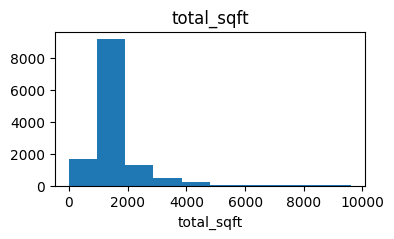

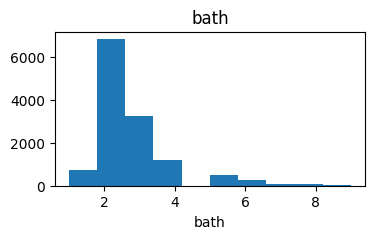

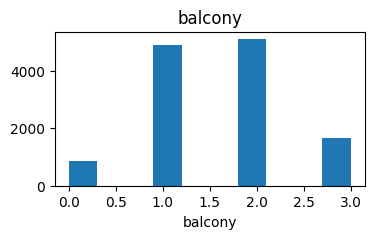

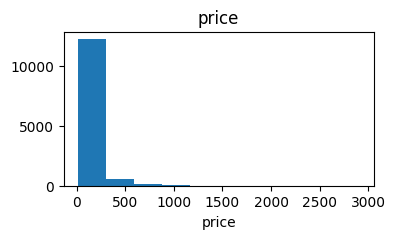

In [141]:
# Select only numerical columns
numeric_columns = Bhouses_restricted.select_dtypes(include=['float64', 'int64']).columns

# Loop through and plot histograms for numerical columns only
for c in numeric_columns:
    plt.figure()
    plt.hist(Bhouses_restricted[c].dropna())  # Drop NaN values if any
    plt.title(c)
    plt.xlabel(c)
    plt.show()

Another take at the histogram plot, showcasing the plots with fewer outliers this time. This permits us to visualize the data in a much cleaner way, allowing us to see more of the plot's right side.

# TASK 8: Correlation analysis
- now look at the correlation of the features and print the correlation report
- plot the correlation heatmap

In [142]:
# Looking at the correlation of the features
# Select only numerical columns
numeric_df = Bhouses_restricted.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


            total_sqft      bath   balcony     price
total_sqft    1.000000  0.555999  0.226022  0.721147
bath          0.555999  1.000000  0.239113  0.487143
balcony       0.226022  0.239113  1.000000  0.123145
price         0.721147  0.487143  0.123145  1.000000


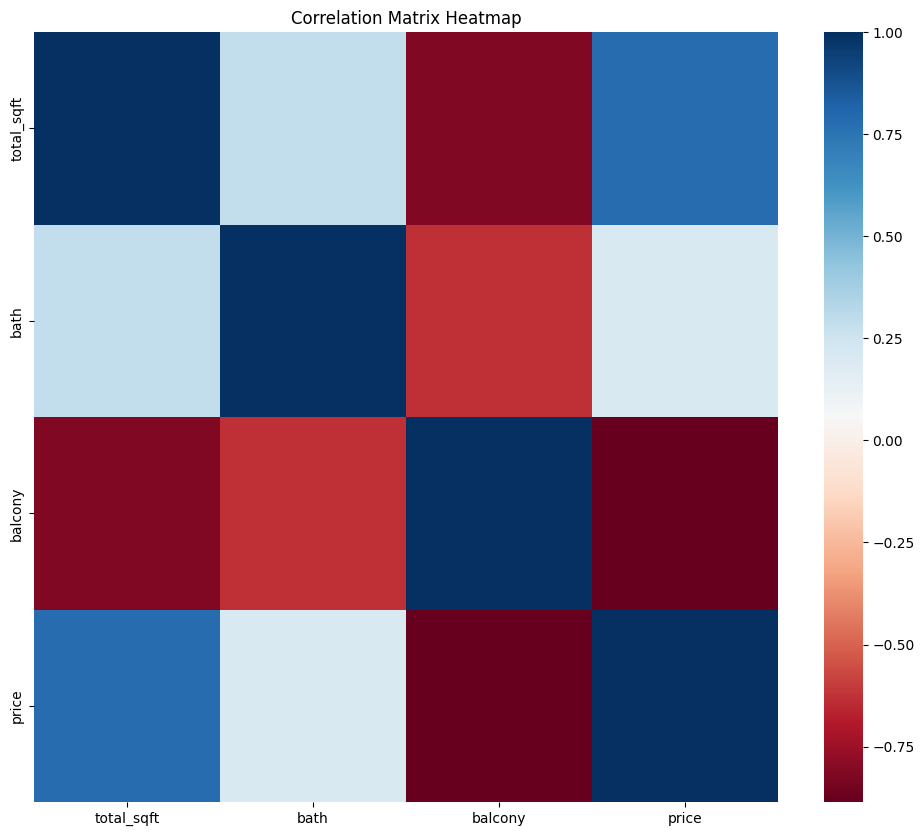

In [143]:
# Ensure only numeric columns are used
numeric_df = Bhouses_restricted.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.corr(), cmap='RdBu')
plt.title('Correlation Matrix Heatmap')
plt.show()

Correlation colormap. We can read from this colormap that the total_sqft has a strong positive correlation with price (dark blue), a weak positive correlation with bath (light blue), and a weak negative correlation with balcony (light red).

Bath has a weak positive correlation with total_sqft (light blue), a weak negative correlation with balcony (light red), and a weak positive correlation with price (light blue).

Balcony has a weak negative correlation with total_sqft (light red), a weak negative correlation with bath (light red), and a strong negative correlation with price (dark red).

Price has a strong positive correlation with total_sqft (dark blue), a weak positive correlation with bath (light blue), and a strong negative correlation with balcony (dark red).

# Task 9:  Which is the most correlated feature? Build a linear regression using this feature as exogenous (independent) variable

- Building a Model
- evaluating the model









In [144]:
# I recommand using sklearn but you can use other methods if you prefer.
# The following line of code assumes you'll use sklearn.

# Assuming 'SalePrice' is your target variable and the rest are features
X = Bhouses_restricted.drop('SalePrice', axis=1)  # Features
y = Bhouses_restricted['SalePrice']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
y_pred = lrModel.predict(X_test)

KeyError: "['SalePrice'] not found in axis"

In [ ]:
# evaluate the model
mse = mean_squared_error(y_test, y_pred)


# Additional stuff for extra credit:
- make a multilinear regression model with bath and total_sqft as exogenous variables
- make a multilinear regression model with all numerical features as exogenous variables

which is better? is there a _significant_ improvement?


In [ ]:
lrModel2 = LinearRegression()
mse = mean_squared_error(y_test, y_pred)

In [ ]:
r2 = r2_score(y_test, y_pred)
print( "R2 {:.2f} adjusted R2:{:g}".format(r2, r2/np.sqrt(Bhouses_restricted.shape[0] - 3)))

In [ ]:
lrModel3 = LinearRegression()
your_code_here()
print( "R2 {:.2f} adjusted R2:{:g}".format(r2, r2/np.sqrt(Bhouses_restricted.shape[0] -
                                                          Bhouses_restricted.shape[1] + 1)))